In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Reading data from ``characters.ascii`` file

You do not have to do something with this file for the homework. Only with the other file.

In [2]:
# https://realpython.com/read-write-files-python/
# with open('characters.ascii', 'r') as reader: # Reads the file
#     d2 = reader.readlines()

In [3]:
# vec = []

# for i in range(len(d2)):
#     # Convert string to array: https://www.educba.com/python-string-to-array/
#     line = d2[i]
#     line = line.replace(".\n", "") #https://stackoverflow.com/questions/3939361/remove-specific-characters-from-a-string-in-python
#     line = line.replace("\n", "")
#     splitted_line = line.split(". ")
# #     print(splitted_line)
# #     print(i)
    
#     if i!= 19:
#         int_split_line = [int(splitted_line[k]) for k in range(len(splitted_line))]
#     else: # Detail with line 19 of file
#         int_split_line = [int(splitted_line[i]) for i in range(len(splitted_line)-1)]
        
#     vec.append(int_split_line)

In [4]:
# lengths = [len(vec[i]) for i in range(len(vec))]
# print(vec[0][0])
# print(len(vec))
# print(len(vec[0]))
# 38*42 #images of 1596 pixels. I do not think so.

Data from ``characters.ascii`` is in ``vec`` in the correct format :)

# Reading data from ``EHT0M.ascii`` file

In [5]:
with open('EHT0M.ascii', 'r') as reader:
    # Read & print the entire file
    d2 = reader.readlines()

In [6]:
d2

['The characters E, H, T, 0 (zero), and M can be generated in MATLAB as follows\n',
 'E=[1 1 1 1 1 1 1 0 0 0 0 0;\n',
 '   1 1 1 1 1 1 1 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 1 1 1 1 0 0 0 0 0 0;\n',
 '   1 1 1 1 1 1 0 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 0 0 0 0 0 0 0 0 0 0;\n',
 '   1 1 1 1 1 1 1 0 0 0 0 0;\n',
 '   1 1 1 1 1 1 1 0 0 0 0 0];\n',
 'H=[0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 1 1 1 1 1 1 0 0;\n',
 '   0 0 1 1 1 1 1 1 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0;\n',
 '   0 0 1 1 0 0 0 0 1 1 0 0];\n',
 '  \n',
 'T=[0 1 1 1 1 1 1 1 1 1 1 0;\n',
 '   0 1 1 1 1 1 1 1 1 1 1 0;\n',
 '   0 0 0 0 0 1 1 0 

In [7]:
asa = []
for i in range(len(d2)):
    asa.append([int(d2[i][k]) for k in range(len(d2[i])) if d2[i][k] == "0" or d2[i][k] == "1"])
    
aux = []
for k in range(len(asa)):
    if len(asa[k]) == 12:
        aux.append(asa[k])

Es = np.concatenate(aux[:12])
Hs = np.concatenate(aux[12:24])     
Ts = np.concatenate(aux[24:36])     
zeros = np.concatenate(aux[36:48])        
Ms = np.concatenate(aux[48:60])  

# E H T zero M

In [8]:
Ms

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [9]:
def change_zeros(values):
    for i in range(len(values)):
        if values[i] == 0:
            values[i] = -1
    return None

In [10]:
change_zeros(Es)
change_zeros(Hs)
change_zeros(Ts)
change_zeros(zeros)
change_zeros(Ms)
print(Ms)

[ 1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1 -1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1
  1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1]


5 training patterns: Es, Hs, Ts, zeros, Ms.
Use them as input and desired output of the network.

# Coding a simple perceptron in Python.

# Code we should use

In [11]:
# Translating the code into Python

def errcorr(X, Y, mu, n, tol):
    nx, mx = len(X), len(X[0])
    ny, my = len(Y), len(Y[0])
    # initialize the memory matrix
    M = [[np.zeros(ny)] for j in range(nx)]
    
    for k in range(n): #n is the maximum number of outer loop iterations
        # randomize the ordering of the vector in both X & Y
        RN = np.random.permutation(mx)#returns a row vector containing a random permutation of the integers from 1 to mx without repeating elements.
        print(len(RN))
#         print(RN)
#         X=X(:,[RN]);
#         Y=Y(:,[RN]);        

        for i in range(mx):
#             M=M+mu*(Y(:,i)-M*X(:,i))*X(:,i)'
            print(RN[i])
#             for i in range(len(X)):
#                 print(X[i][0])
            M = M + mu*(Y[:][RN[i]] - M*X[:][RN[i]]) * X[:][RN[i]].T 
    
        if np.linalg.norm(Y-M*X) <= tol:
#         if max(max(np.abs(Y-M*X))) <= tol # changed by EM
            print('Gradient Search Terminated ===>>> ||Y-M*X||<=tol')
            print('Number of Iterations = ',n)
            break
    return M

# Creo que el error radica en que tenemos vectores de 1*144 y al obtener la matriz transpuesta, se estan obteniendo otras entradas que no queriamos. Porque tambien si ves las celdas de abajo, esta raro como se obtienen los indices.

In [12]:
X = [Es, Hs, Ts, zeros, Ms] # input matrix
X[:][0]

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1])

In [13]:
for i in range(len(X)):
    print(X[i][0])
# X[:][]#[:]
#1 - - - 1

1
-1
-1
-1
1


In [14]:
def errcorr_1D(X, Y, mu, n, tol):
    nx, mx = 1, len(X)
    ny, my = 1, len(Y)
    # initialize the memory matrix
    M = np.zeros(len(X))
    Ms = []
    #[[np.zeros(ny)] for j in range(nx)]
    
    for k in range(n): #n is the maximum number of outer loop iterations
        # randomize the ordering of the vector in both X & Y
        RN = np.random.permutation(mx)#returns a row vector containing a random permutation of the integers from 1 to mx without repeating elements.

        for i in range(mx): # For each element of the input X
            M = M + mu*(Y[RN[i]] - M*X[RN[i]]) * X[RN[i]].T 
        
        Ms.append(M)
        
#         if np.linalg.norm(Y-M*X) <= tol:
        if max(np.abs(Y-M*X)) <= tol: # changed by EM
            print('Gradient Search Terminated ===>>> ||Y-M*X||<=tol')
            print('Number of Iterations = ',k)
            break
    return Ms

In [15]:
X = Es # input matrix
Y = Es # output matrix
mu = 0.2 #learning rate
n = 10
tol = 0.01 # error tolerance value
# n * mx #the number of outer loops times the number of patterns run through the network in each loop).
# number of times we update the weights in the learning process

Ms = errcorr_1D(X, Y, mu, n, tol)
print(Ms)

Gradient Search Terminated ===>>> ||Y-M*X||<=tol
Number of Iterations =  0
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])]


Now that the perceptron learned, we will input X and let it go through the memory matrix and see what image was recalled.

In [16]:
Y_recalled = Ms*X

for i in range(len(Y_recalled[0])):
    if Y_recalled[0][i] < 0:
        Y_recalled[0][i] = 0
print(Y_recalled.reshape(12,12))
print(X.reshape(12,12))

[[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1]]


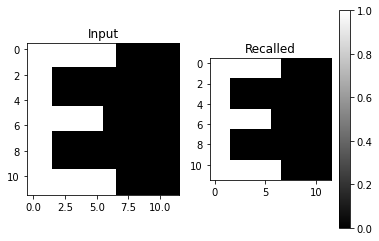

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X.reshape(12,12), cmap="gray")
ax1.set_title('Input')
pos = ax2.imshow(Y_recalled.reshape(12,12), cmap="gray")
ax2.set_title('Recalled')

fig.colorbar(pos, ax=ax2)

plt.show()

# Corrupting images by 20%

In [18]:
def corrupt(input_vec, percentage=0.2):
    length = int(np.round(len(input_vec)*percentage))
    permuts = np.random.permutation(len(input_vec)) # randomize indices of input_vec  
    corrupt_vec = input_vec.copy()
    
    for i in range(length):# Loop for those indices
    # Change those values to -1 or 1, depending, 2 if statements
        if input_vec[permuts[i]] > 0: #Flips 1 to -1
            corrupt_vec[permuts[i]] = -1
        else: # Flips -1 to 1
            corrupt_vec[permuts[i]] = 1
    
    return corrupt_vec

In [19]:
Es_corr = corrupt(Es)

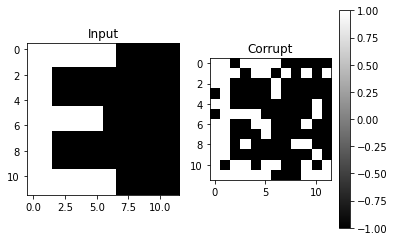

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Es.reshape(12,12), cmap="gray")
ax1.set_title('Input')
pos = ax2.imshow(Es_corr.reshape(12,12), cmap="gray")
ax2.set_title('Corrupt')

fig.colorbar(pos, ax=ax2)

plt.show()

In [25]:
Y_rec_corr = Ms*Es_corr

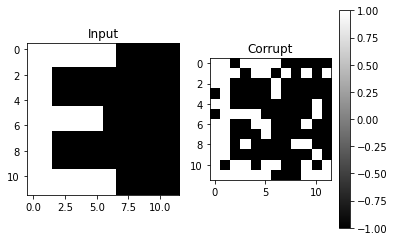

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Es.reshape(12,12), cmap="gray")
ax1.set_title('Input')
pos = ax2.imshow(Y_rec_corr.reshape(12,12), cmap="gray")
ax2.set_title('Recalled')

fig.colorbar(pos, ax=ax2)

plt.show()

But this is not recalling anything. Are you sure for recall you simply obtain X*M?

Code for L4-AssociativeMemory
The MATLAB function to implement the error-correction algorithm
for computing the correlation matrix memory is given below.
Credit for code: Ham and Kostanic, Principles of Neurocomputing for Science and Engineering,
McGraw Hill, 2001

```
function M=errcorr(X,Y,mu,n,tol)
[nx,mx]=size(X);
[ny,my]=size(Y);
%initialize the memory matrix
M=zeros(ny,nx);
for k=1:n %n is the maximum number of outer loop iterations
% randomize the ordering of the vector in both X & Y
RN=randperm(mx);
X=X(:,[RN]);
Y=Y(:,[RN]);
for i=1:mx
M=M+mu*(Y(:,i)-M*X(:,i))*X(:,i)';
end
%if norm(Y-M*X)<=tol
if max(max(abs(Y-M*X))) <= tol
 % changed by EM
disp('Gradient Search Terminated ===>>> ||Y-
M*X||<=tol')
disp('Number of Iterations = '), disp(n*i)
break
end
end
```

Notes by EM:
- X and Y are, respectively, the input and output data matrices (as on the slide of eq. (4.14)), whose columns are the vectorized character images in HW03.
- The number of learning steps, i.e., the number of times we update the weights in the learning process, is n * mx (the number of outer loops times the number of patterns run through the network in each loop).
- I changed the error criterion for stopping (||Y-MX|| <=tol) to a more intuitive one (ponder it). Feel free to use either but take care of reporting the one you use in the line ‘Gradient Search Terminated ....’
- The number of iterations is obviously incorrectly reported in this code as n*i. Correct it in your copy!


In [73]:
# Code from: https://maviccprp.github.io/a-perceptron-in-just-a-few-lines-of-python-code/
# Note the learning rule in this file is different than the one we are using

def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n): # Maximum iteration loop
        total_error = 0
        
        for i in range(len(X)): # Smaller vector entries of input vector
            for j in range(len(X[i])): # Cycle for each of those smaller vector entries 
                print(i, "  ",j)
                print("x", X[i][j])
#                 print("w", w[j])
                print("y", Y[i][j])
                if (np.dot(X[i][j], w[j])*Y[i][j]) <= 0:
                    total_error += (np.dot(X[i][j], w[j])*Y[i][j])
                    w[j] = w[j] + eta*X[i][j]*Y[i][j]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

In [74]:
type(Es)
type(X)

list

In [75]:
len(X[0])

144

In [76]:
# EL detalle es que ahora la salida no son solamente -1 y 1, sino que es la misma entrada, tambien un vector.

In [83]:
X[1][0]

-1

In [77]:
# X = np.array([
#     [-2,4,-1],
#     [4,1,-1],
#     [1, 6, -1],
#     [2, 4, -1],
#     [6, 2, -1],

# ])

# y = np.array([-1,-1,1,1,1])

X = [Es, Hs, Ts, zeros, Ms] # input matrix
y = [Es, Hs, Ts, zeros, Ms] # output matrix

w = perceptron_sgd_plot(X,y)
print(w)

0    0
x 1
y 1
0    1
x 1
y 1
0    2
x 1
y 1
0    3
x 1
y 1
0    4
x 1
y 1
0    5
x 1
y 1
0    6
x 1
y 1
0    7
x -1
y -1
0    8
x -1
y -1
0    9
x -1
y -1
0    10
x -1
y -1
0    11
x -1
y -1
0    12
x 1
y 1
0    13
x 1
y 1
0    14
x 1
y 1
0    15
x 1
y 1
0    16
x 1
y 1
0    17
x 1
y 1
0    18
x 1
y 1
0    19
x -1
y -1
0    20
x -1
y -1
0    21
x -1
y -1
0    22
x -1
y -1
0    23
x -1
y -1
0    24
x 1
y 1
0    25
x 1
y 1
0    26
x -1
y -1
0    27
x -1
y -1
0    28
x -1
y -1
0    29
x -1
y -1
0    30
x -1
y -1
0    31
x -1
y -1
0    32
x -1
y -1
0    33
x -1
y -1
0    34
x -1
y -1
0    35
x -1
y -1
0    36
x 1
y 1
0    37
x 1
y 1
0    38
x -1
y -1
0    39
x -1
y -1
0    40
x -1
y -1
0    41
x -1
y -1
0    42
x -1
y -1
0    43
x -1
y -1
0    44
x -1
y -1
0    45
x -1
y -1
0    46
x -1
y -1
0    47
x -1
y -1
0    48
x 1
y 1
0    49
x 1
y 1
0    50
x -1
y -1
0    51
x -1
y -1
0    52
x -1
y -1
0    53
x -1
y -1
0    54
x -1
y -1
0    55
x -1
y -1
0    56
x -1
y -1
0    57
x -1
y -1
0    5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [78]:
np.dot([1,2, 4], 2)

array([2, 4, 8])